In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Given points
points = np.array([
    [1, 2],
    [4, 5],
    [3, 4],
    [6, 2],
    [7, 3],
    [8, 5],
    [9, 6],
    [10, 2],
    [5, 5],
    [11, 6]
])

# Compute pairwise Euclidean distances
distance_matrix = cdist(points, points, metric='euclidean')

# Convert to DataFrame for better readability
distance_df = pd.DataFrame(distance_matrix, columns=[f"P{i+1}" for i in range(len(points))],
                           index=[f"P{i+1}" for i in range(len(points))])

distance_df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,4.242641,2.828427,5.000000,6.082763,7.615773,8.944272,9.000000,5.000000,10.770330
P2,4.242641,0.000000,1.414214,3.605551,3.605551,4.000000,5.099020,6.708204,1.000000,7.071068
P3,2.828427,1.414214,0.000000,3.605551,4.123106,5.099020,6.324555,7.280110,2.236068,8.246211
P4,5.000000,3.605551,3.605551,0.000000,1.414214,3.605551,5.000000,4.000000,3.162278,6.403124
P5,6.082763,3.605551,4.123106,1.414214,0.000000,2.236068,3.605551,3.162278,2.828427,5.000000
P6,7.615773,4.000000,5.099020,3.605551,2.236068,0.000000,1.414214,3.605551,3.000000,3.162278
P7,8.944272,5.099020,6.324555,5.000000,3.605551,1.414214,0.000000,4.123106,4.123106,2.000000
P8,9.000000,6.708204,7.280110,4.000000,3.162278,3.605551,4.123106,0.000000,5.830952,4.123106
P9,5.000000,1.000000,2.236068,3.162278,2.828427,3.000000,4.123106,5.830952,0.000000,6.082763
P10,10.770330,7.071068,8.246211,6.403124,5.000000,3.162278,2.000000,4.123106,6.082763,0.000000


In [ ]:
# Define distance threshold
threshold = 4

# Count neighbors within threshold (excluding self)
neighbor_counts = np.sum(distance_matrix <= threshold, axis=1) - 1  # Exclude self

# Compute average neighbor density
avg_density = np.mean(neighbor_counts)

# Compute KLE Score
kle_scores = neighbor_counts / avg_density

# Create neighbor list for each point
neighbor_list = []
for i in range(len(points)):
    neighbors = [f"P{j+1}" for j in range(len(points)) if distance_matrix[i, j] <= threshold and i != j]
    neighbor_list.append(", ".join(neighbors) if neighbors else "None")

# Create DataFrame for KLE scores
kle_df = pd.DataFrame({
    "Point": [f"P{i+1}" for i in range(len(points))],
    "Neighbors": neighbor_list,
    "Num Neighbors": neighbor_counts,
    "KLE Score": kle_scores
})

kle_df

,Point,Neighbors,Num Neighbors,KLE Score
0,P1,P3,1,0.238095
1,P2,"P3, P4, P5, P6, P9",5,1.190476
2,P3,"P1, P2, P4, P9",4,0.952381
3,P4,"P2, P3, P5, P6, P8, P9",6,1.428571
4,P5,"P2, P4, P6, P7, P8, P9",6,1.428571
5,P6,"P2, P4, P5, P7, P8, P9, P10",7,1.666667
6,P7,"P5, P6, P10",3,0.714286
7,P8,"P4, P5, P6",3,0.714286
8,P9,"P2, P3, P4, P5, P6",5,1.190476
9,P10,"P6, P7",2,0.476190


In [ ]:
# Define outliers as points with KLE Score < 1
outliers = kle_df[kle_df["KLE Score"] < 1]
normal_points = kle_df[kle_df["KLE Score"] >= 1]

# Extract outlier points
outlier_indices = [int(p[1:]) - 1 for p in outliers["Point"]]
outlier_coords = np.array(points)[outlier_indices]

# Format and print outlier points
outlier_points_str = ", ".join(f"({x}, {y})" for x, y in outlier_coords)
print(f"Outlier points: {outlier_points_str}")

Outlier points: (1, 2), (3, 4), (9, 6), (10, 2), (11, 6)


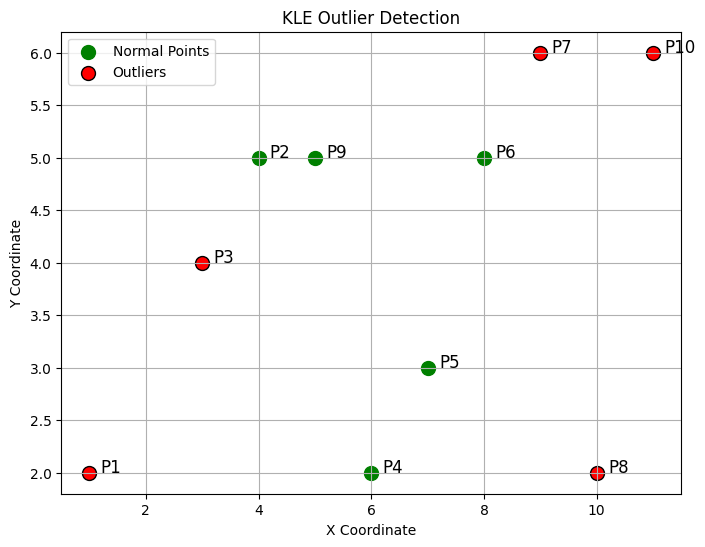

In [ ]:
# Extract coordinates for plotting
outlier_indices = [int(p[1:]) - 1 for p in outliers["Point"]]  # Convert P1 -> 0, P2 -> 1, ...
normal_indices = [int(p[1:]) - 1 for p in normal_points["Point"]]

outlier_coords = np.array(points)[outlier_indices]
normal_coords = np.array(points)[normal_indices]

# Plot points
plt.figure(figsize=(8, 6))
plt.scatter(normal_coords[:, 0], normal_coords[:, 1], color='green', label='Normal Points', s=100)
plt.scatter(outlier_coords[:, 0], outlier_coords[:, 1], color='red', label='Outliers', s=100, edgecolors='black')

# Annotate points
for i, (x, y) in enumerate(points):
    plt.text(x + 0.2, y, f"P{i+1}", fontsize=12)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("KLE Outlier Detection")
plt.legend()
plt.grid(True)
plt.show()